In [181]:
from functions import utils_plot
from functions import utils_get
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Read MOER data

In [182]:
df_moer = pd.read_csv("./moer/moer_15.csv")
df_moer.head()

,datetime,value,moer
0,2023-01-01 00:00:00+00:00,997.000000,452.638000
1,2023-01-01 00:15:00+00:00,995.000000,451.730000
2,2023-01-01 00:30:00+00:00,995.333333,451.881333
3,2023-01-01 00:45:00+00:00,995.333333,451.881333
4,2023-01-01 01:00:00+00:00,987.000000,448.098000


In [183]:
df_moer['datetime'] = pd.to_datetime(df_moer['datetime'])
df_moer['datetime'] = df_moer['datetime'].dt.tz_convert('America/Los_Angeles')

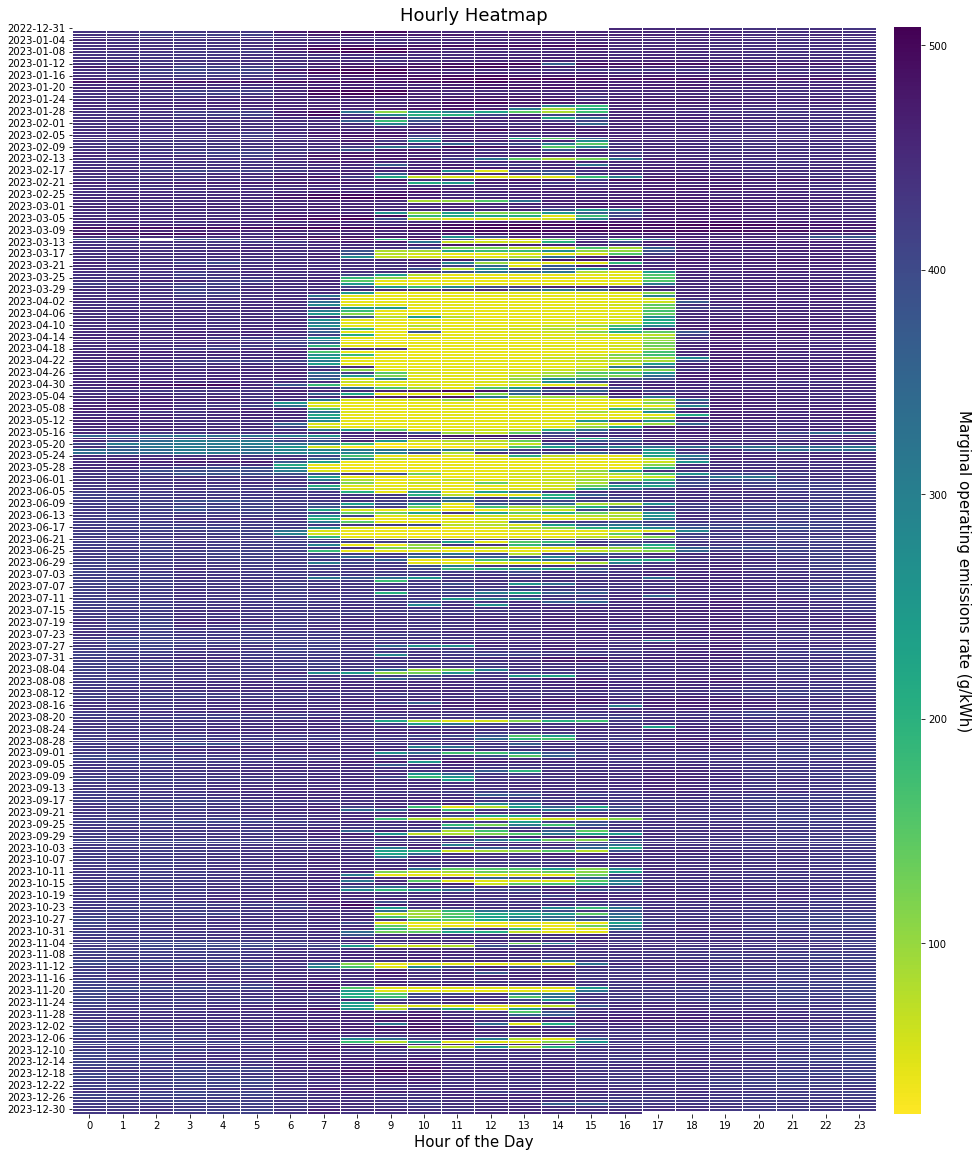

In [184]:
utils_plot.plot_hourly_heatmap(df_moer, ['moer'], "Marginal operating emissions rate (g/kWh)", figsize=(18, 20))

Read power data

In [185]:
data_df = pd.read_csv("./sw/sw.csv")
data_df['datetime'] = pd.to_datetime(data_df['datetime'])
data_df['datetime'] = data_df['datetime'].dt.tz_localize('America/Los_Angeles', nonexistent='shift_forward', ambiguous=True)
df_power = utils_get.get_power(df=data_df, unit="W")
df_power.head()

/Users/aoyuzou/opt/anaconda3/lib/python3.9/site-packages/pandas/core/indexing.py:1851: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, val, pi)


,datetime,SDH.SW.MSA.CD4RA.PWR REAL 3 P,SDH.SW.MSA.ATS-ES.PWR REAL 3 P,SDH.SW.MSA.MSB.TIE.PWR REAL 3P,SDH.SW.MSA.MS41A.PWR REAL 3 P,SDH.SW.MSA.MDC.PWR REAL 3 P,SDH.SW.MSA.ATS-E2.PWR REAL 3 P,SDH.SW.MSB.MS41B.PWR REAL 3 P,SDH.SW.MSA.MAIN.PWR REAL 3 P,SDH.SW.MSA.MSB.PWR REAL 3 P,SDH.SW.MSB.ATS-EL.PWR REAL 3 P,SDH.SW.MSA.ATS-E1.PWR REAL 3 P,SDH.SW.MSB.CB4A.PWR REAL 3 P,SDH.SW.MSA.CH-2.PWR REAL 3 P,SDH.SW.MSA.MS41B.PWR REAL 3 P,SDH.SW.MSA.CD41A.PWR REAL 3 P,SDH.SW.MSB.MS41A.PWR REAL 3 P,SDH.SW.MSB.MAIN.PWR REAL 3 P
0,2023-01-20 15:45:00-08:00,24.999,16.999,0.0,331.999,22.999,30.999,179.999,537.999,0.0,93.999,59.999,55.999,71.999,0.0,29.999,0.0,379.999
1,2023-01-20 16:00:00-08:00,26.999,17.999,0.0,330.999,23.999,30.999,177.999,539.999,0.0,95.999,58.999,55.999,73.999,0.0,32.999,0.0,367.999
2,2023-01-20 16:15:00-08:00,24.999,17.499,0.0,334.499,24.499,27.999,175.499,546.999,0.0,102.999,69.999,57.999,70.999,0.0,25.999,0.0,363.499
3,2023-01-20 16:30:00-08:00,23.999,16.999,0.0,319.999,23.999,24.999,186.999,535.999,0.0,94.999,59.999,55.999,73.999,0.0,27.999,0.0,368.999
4,2023-01-20 16:45:00-08:00,23.999,17.999,0.0,325.999,23.499,30.999,160.999,542.499,0.0,99.999,60.999,54.999,68.999,0.0,29.999,0.0,366.499


Read climate data

In [186]:
df_climate = pd.read_csv("./climate/climate.csv")
df_climate['datetime'] = pd.to_datetime(df_climate['datetime'])
df_climate['datetime'] = df_climate['datetime'].dt.tz_localize('America/Los_Angeles', nonexistent='shift_forward', ambiguous=True)
df_climate.head()

,datetime,air_temp,dni,ghi,t_out,rh_out,wind_s,lat,long,time_zone
0,2023-01-01 00:00:00-08:00,10.0,0.0,0.0,11.5,NaN,3.1,37.871666,-122.272781,America/Los_Angeles
1,2023-01-01 00:15:00-08:00,10.0,0.0,0.0,11.5,NaN,3.1,37.871666,-122.272781,America/Los_Angeles
2,2023-01-01 00:30:00-08:00,10.0,0.0,0.0,11.5,NaN,3.1,37.871666,-122.272781,America/Los_Angeles
3,2023-01-01 00:45:00-08:00,10.0,0.0,0.0,11.5,NaN,3.1,37.871666,-122.272781,America/Los_Angeles
4,2023-01-01 01:00:00-08:00,10.0,0.0,0.0,10.9,NaN,3.1,37.871666,-122.272781,America/Los_Angeles


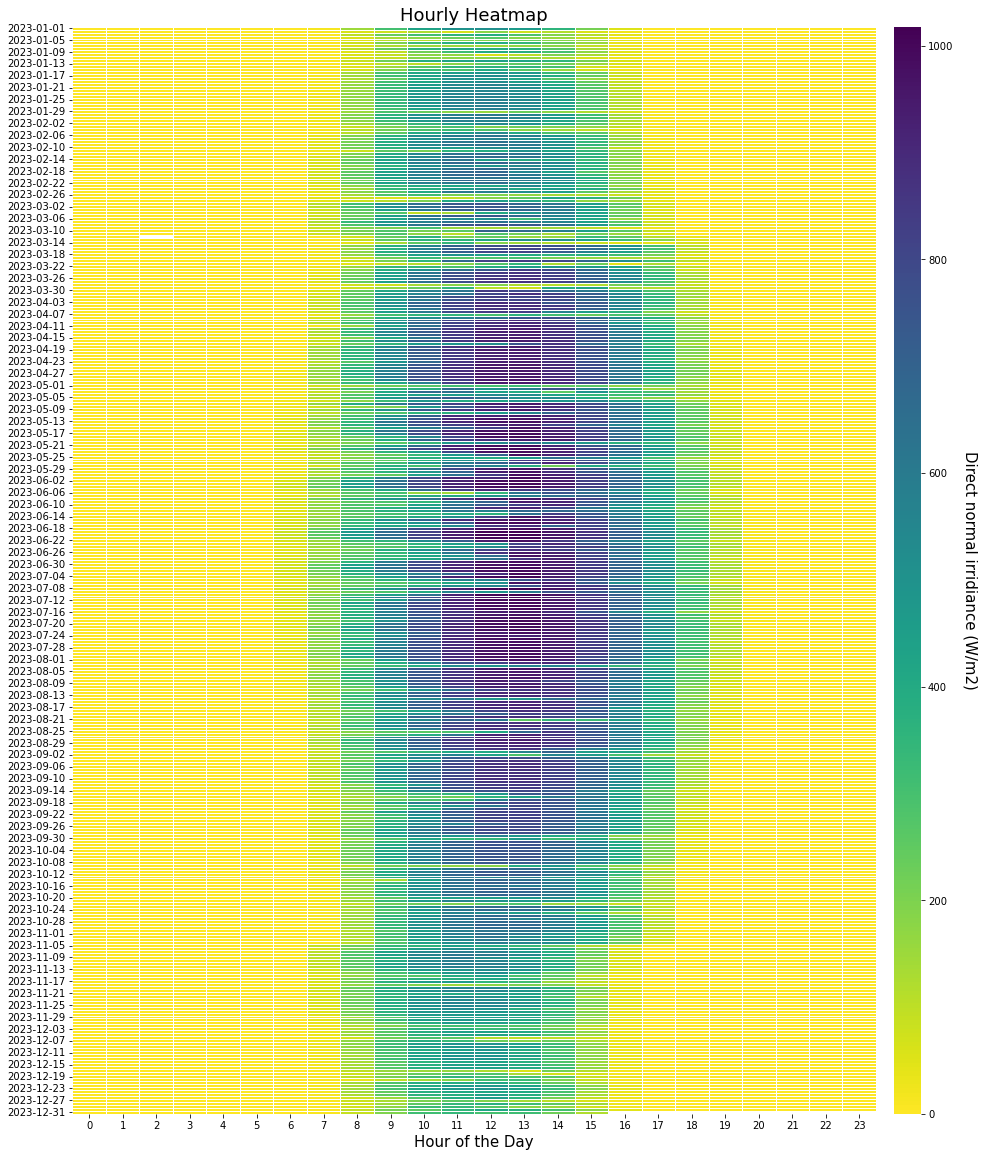

In [187]:
utils_plot.plot_hourly_heatmap(df_climate, ['ghi'], "Direct normal irridiance (W/m2)", figsize=(18, 20))

Grid demand and supply information from California ISO

In [188]:
grid_demand = utils_get.get_grid_demand('./grid/demand/*.csv')
grid_solar = utils_get.get_grid_renew('./grid/renewables/*.csv', 'Solar')
grid_wind = utils_get.get_grid_renew('./grid/renewables/*.csv', 'Wind')
grid_renew = pd.merge(grid_solar, grid_wind, on='datetime', how='outer')
grid_renew['renew'] = grid_renew['Solar'] + grid_renew['Wind']
df_grid = pd.merge(grid_renew, grid_demand, on='datetime', how='outer')
df_grid.head()

,datetime,Solar,Wind,renew,demand
0,2023-02-01 00:00:00-08:00,-4.54523,284.48324,279.93801,23146.0
1,2023-02-01 00:00:00-08:00,-4.54523,17.65355,13.10832,23146.0
2,2023-02-01 00:00:00-08:00,0.40150,284.48324,284.88474,23146.0
3,2023-02-01 00:00:00-08:00,0.40150,17.65355,18.05505,23146.0
4,2023-02-01 00:00:00-08:00,-5.65649,284.48324,278.82675,23146.0


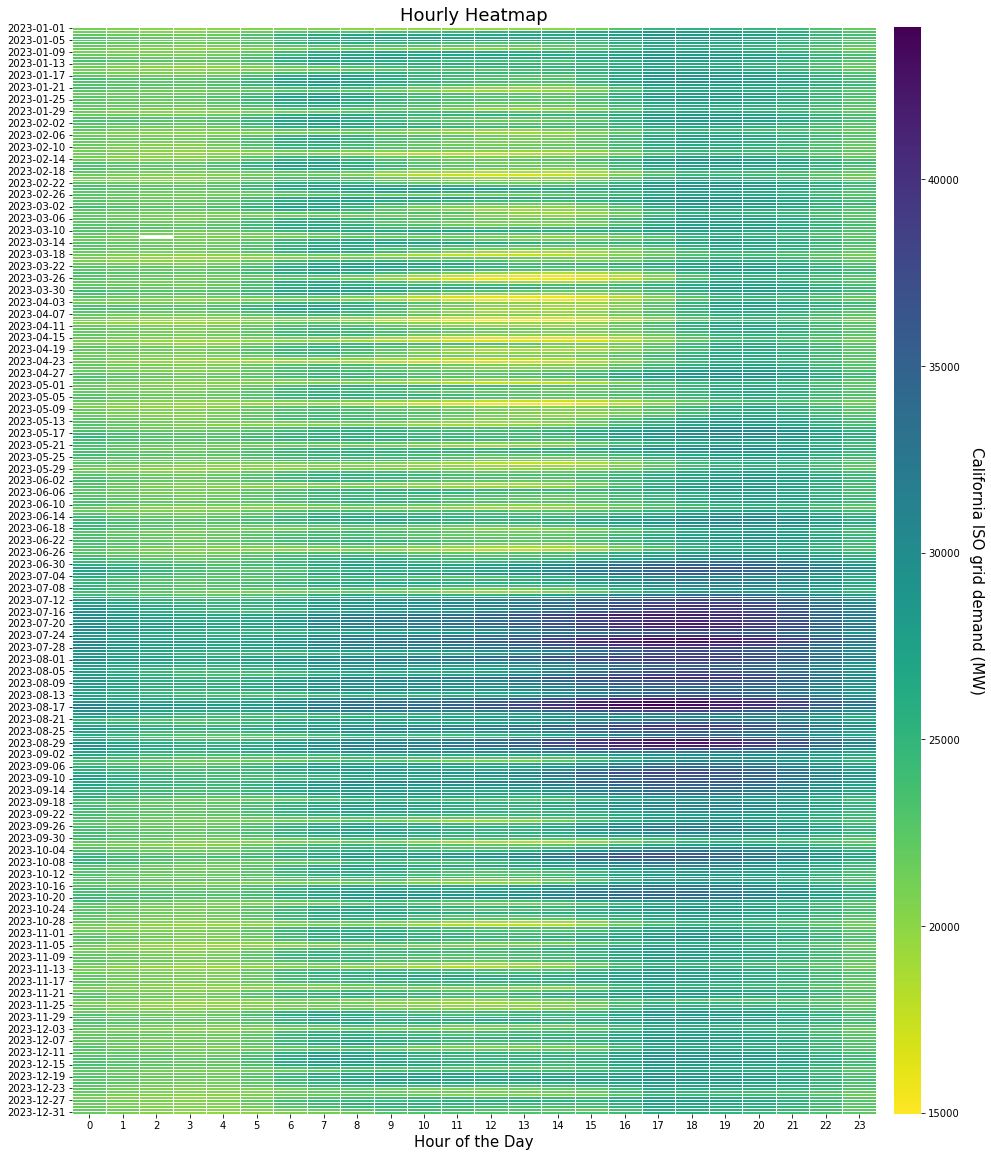

In [189]:
utils_plot.plot_hourly_heatmap(df_grid, ['demand'], 'California ISO grid demand (MW)', figsize=(18, 20))

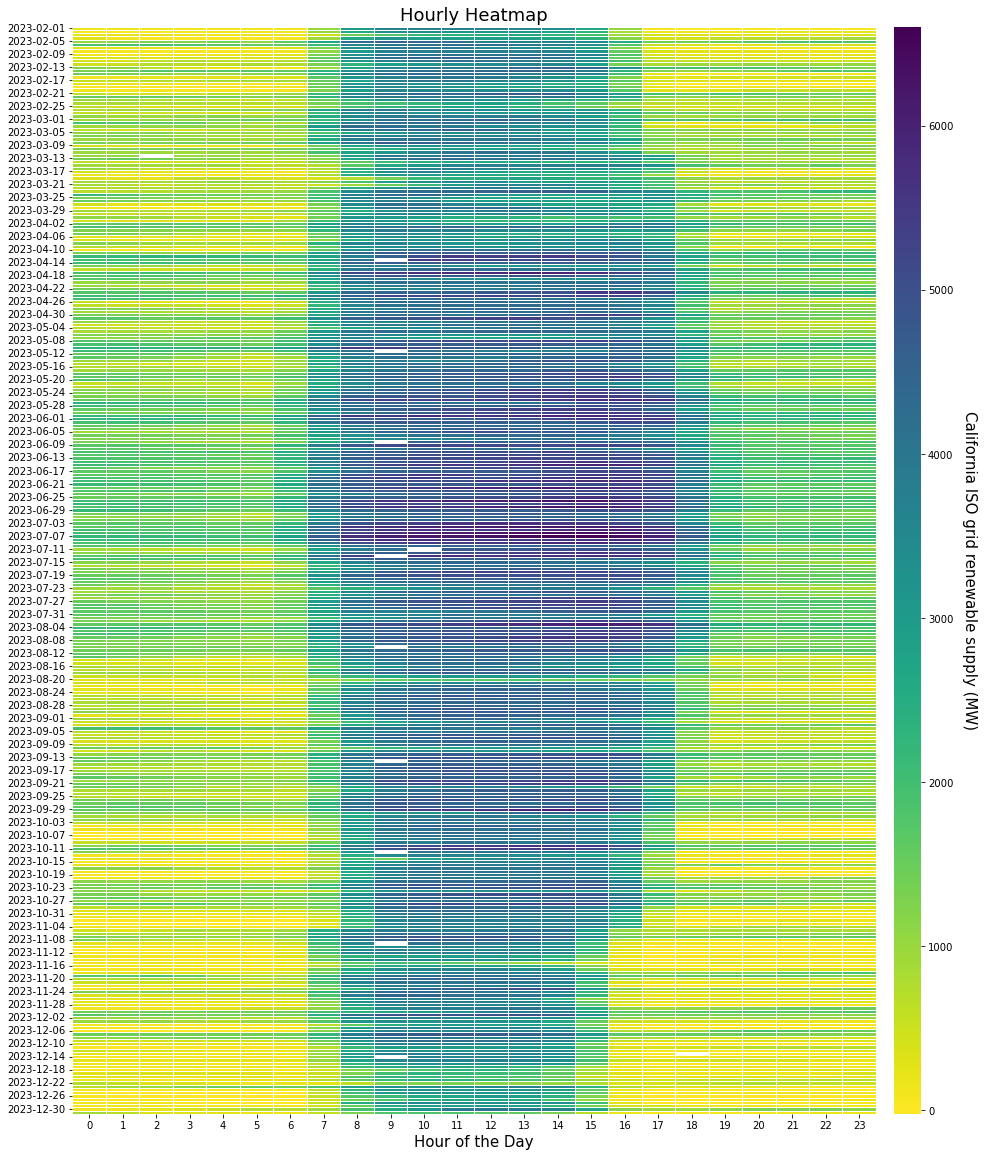

In [190]:
utils_plot.plot_hourly_heatmap(df_grid, ['renew'], 'California ISO grid renewable supply (MW)', figsize=(18, 20))

## Task 1: Examing HVAC carbon emissions at Main station level

In [191]:
hvac = df_power['SDH.SW.MSA.MAIN.PWR REAL 3 P'] - df_power['SDH.SW.MSA.MS41A.PWR REAL 3 P'] + df_power['SDH.SW.MSB.MS41B.PWR REAL 3 P']
df_HVAC = pd.DataFrame({'datetime': df_power['datetime'], 'HVAC': hvac})
columns = ['HVAC']
df_HVAC.head()

,datetime,HVAC
0,2023-01-20 15:45:00-08:00,385.999
1,2023-01-20 16:00:00-08:00,386.999
2,2023-01-20 16:15:00-08:00,387.999
3,2023-01-20 16:30:00-08:00,402.999
4,2023-01-20 16:45:00-08:00,377.499


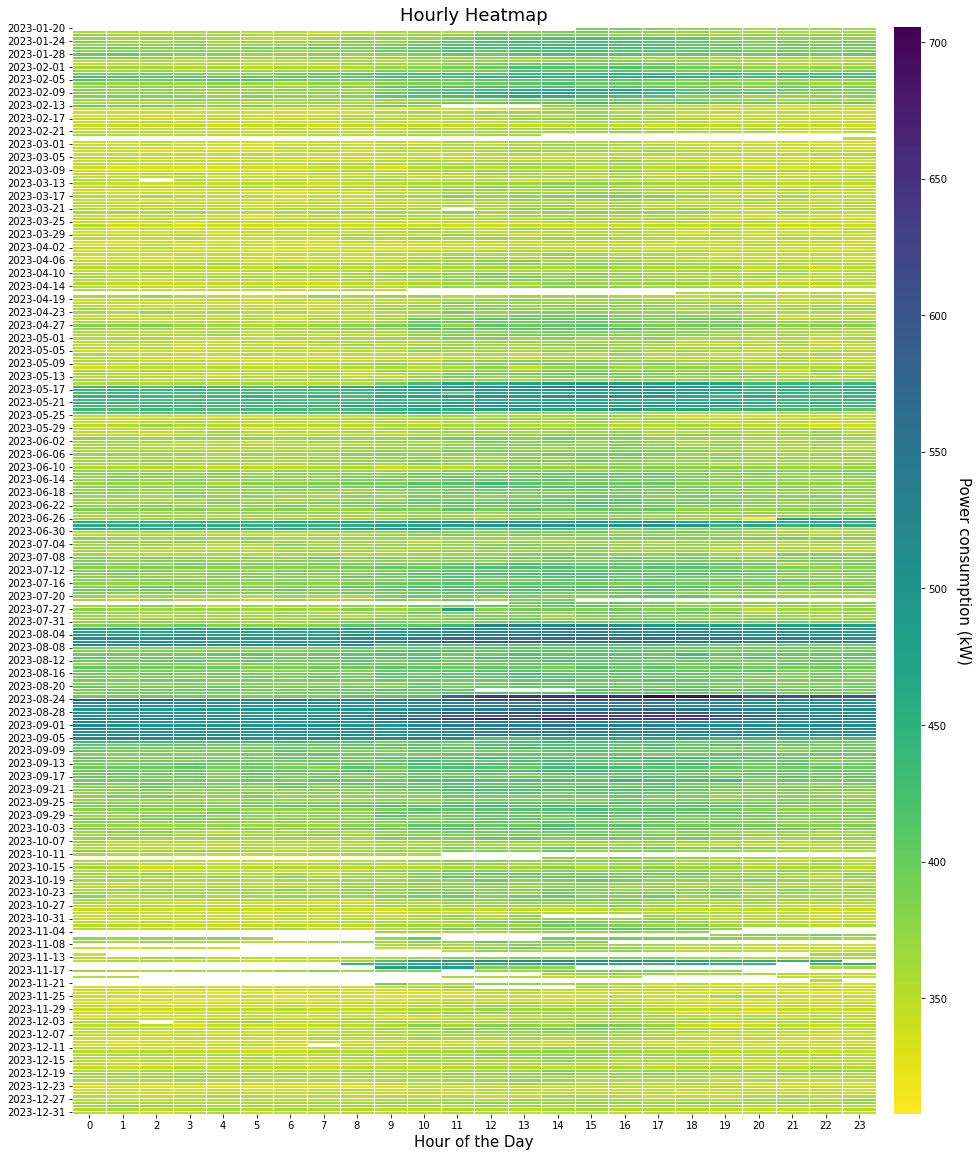

In [192]:
utils_plot.plot_hourly_heatmap(df_HVAC, columns, 'Power consumption (kW)', figsize=(18, 20))

Get emissions data

In [193]:
df_temp = pd.merge(df_HVAC, df_moer, on = 'datetime', how = 'outer')
df_emissions = df_temp.copy()

# Multiply all columns except the first and last by the last column
df_emissions.iloc[:, 1:-1] = df_emissions.iloc[:, 1:-1].multiply(df_emissions.iloc[:, -1], axis="index") / 1000
df_emissions = df_emissions.drop(columns=['value', 'moer'])
# Now 'new_df' is the new DataFrame with the desired calculations

df_emissions.head()

,datetime,HVAC
0,2023-01-20 15:45:00-08:00,182.954262
1,2023-01-20 16:00:00-08:00,177.044561
2,2023-01-20 16:15:00-08:00,176.210263
3,2023-01-20 16:30:00-08:00,182.595623
4,2023-01-20 16:45:00-08:00,171.098905


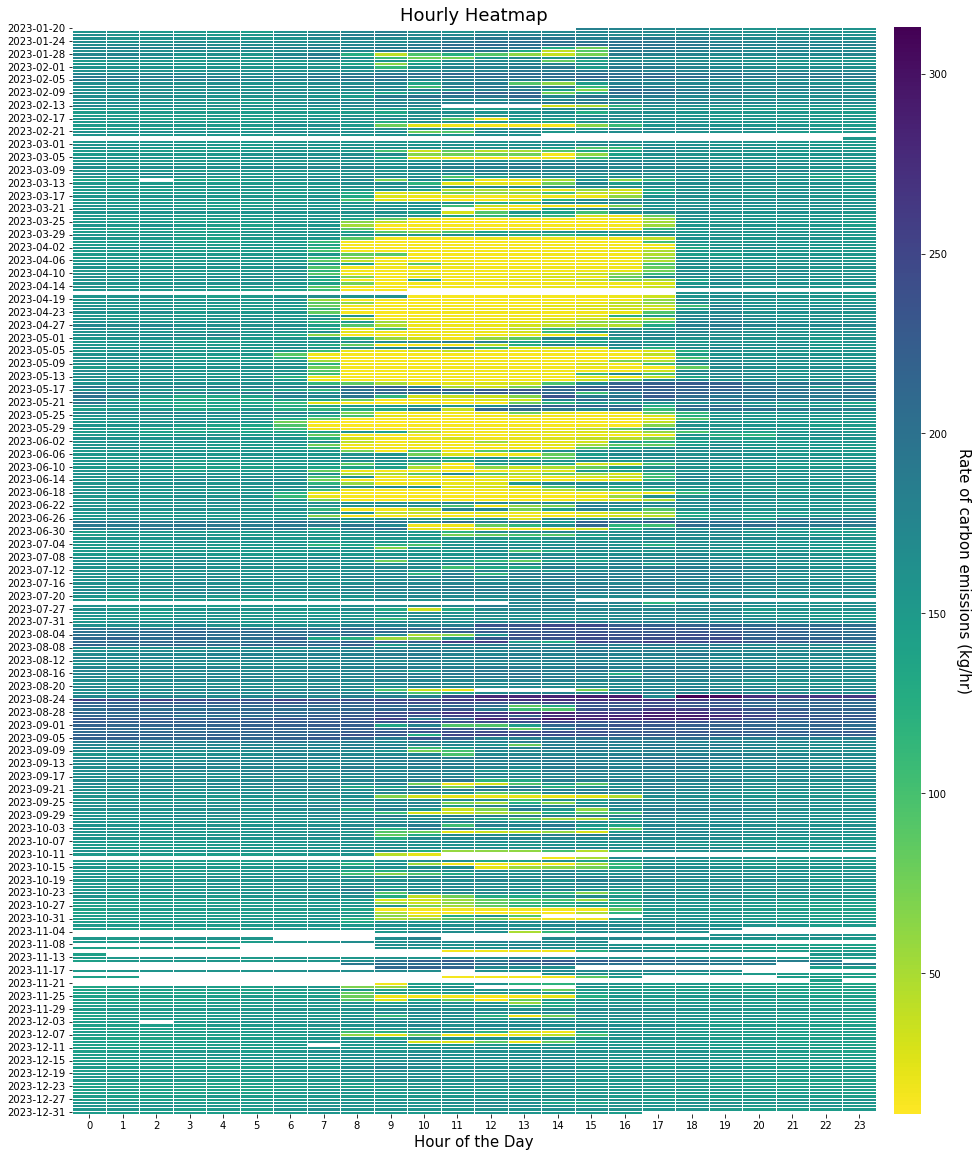

In [194]:
utils_plot.plot_hourly_heatmap(df_emissions, columns, 'Rate of carbon emissions (kg/hr)', figsize=(18, 20))

Get overall dataframe

In [195]:
df_all = pd.merge(df_emissions[['datetime', 'HVAC']], df_climate, on = 'datetime', how = 'outer')
df_all.head()

,datetime,HVAC,air_temp,dni,ghi,t_out,rh_out,wind_s,lat,long,time_zone
0,2023-01-20 15:45:00-08:00,182.954262,13.0,680.0,207.0,13.2,NaN,1.5,37.871666,-122.272781,America/Los_Angeles
1,2023-01-20 16:00:00-08:00,177.044561,13.0,622.0,164.0,12.8,NaN,3.1,37.871666,-122.272781,America/Los_Angeles
2,2023-01-20 16:15:00-08:00,176.210263,12.0,545.0,121.0,12.8,NaN,3.1,37.871666,-122.272781,America/Los_Angeles
3,2023-01-20 16:30:00-08:00,182.595623,12.0,445.0,79.0,12.8,NaN,3.1,37.871666,-122.272781,America/Los_Angeles
4,2023-01-20 16:45:00-08:00,171.098905,12.0,225.0,40.0,12.8,NaN,3.1,37.871666,-122.272781,America/Los_Angeles


Hourly average scatter plot

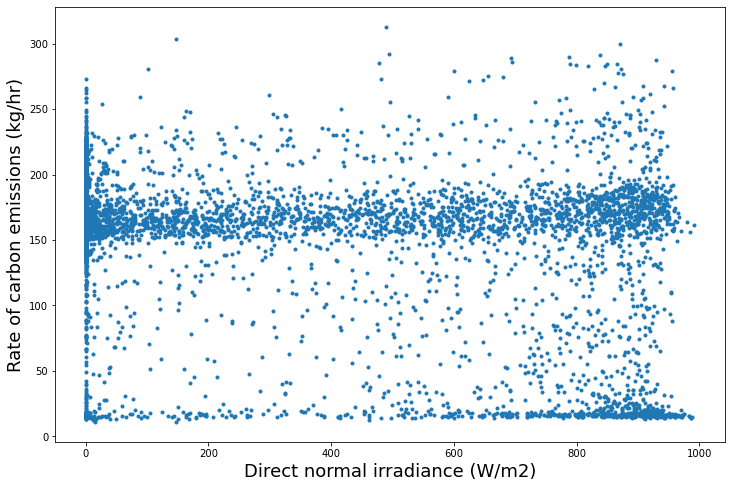

In [196]:
df_hourly = df_all.set_index('datetime')
df_hourly = df_hourly.resample('1H').mean()
df_hourly.reset_index(inplace=True)
plt.figure(figsize=[12, 8])
plt.plot(df_hourly['dni'], df_hourly['HVAC'], '.')
plt.xlabel('Direct normal irradiance (W/m2)', fontsize = 18)
plt.ylabel('Rate of carbon emissions (kg/hr)', fontsize = 18)
plt.show()

Occupied hours

In [197]:
df_hourly_occ = df_hourly[(df_hourly['datetime'].dt.hour >= 7) & (df_hourly['datetime'].dt.hour <= 18)]

Time window: Mar - Jun

In [198]:
df_MJ = df_hourly_occ[(df_hourly_occ['datetime'].dt.month >= 3) & (df_hourly_occ['datetime'].dt.month <= 6)]
df_MJ = df_MJ[columns + ['air_temp', 't_out', 'dni', 'ghi']]

/Users/aoyuzou/Documents/Mac/ClassMaterial/ARCH299/SDH/functions/utils_plot.py:96: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([f'{y:.2f}{unit}' for y in y_ticks])


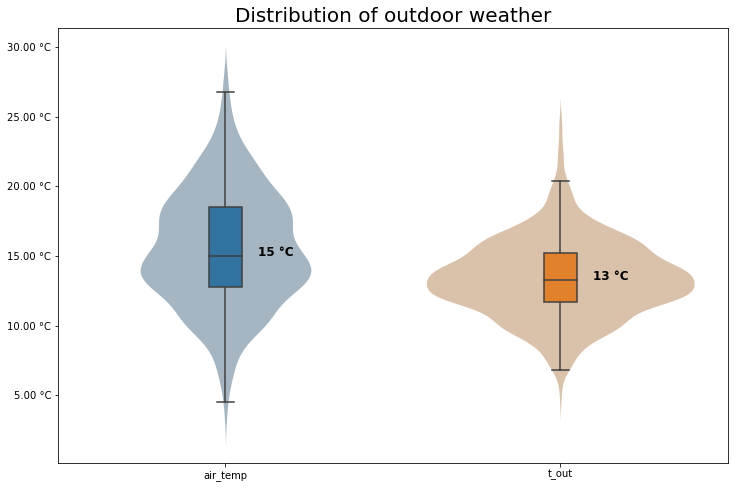

In [199]:
utils_plot.create_violin_plot(df_MJ, ['air_temp', 't_out'], ' °C', 'Distribution of outdoor weather', figsize=(12, 8))

/Users/aoyuzou/Documents/Mac/ClassMaterial/ARCH299/SDH/functions/utils_plot.py:96: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([f'{y:.2f}{unit}' for y in y_ticks])


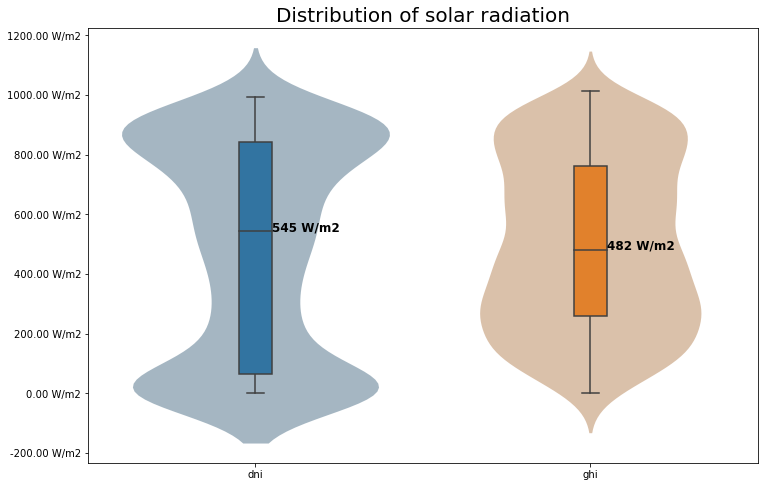

In [200]:
utils_plot.create_violin_plot(df_MJ, ['dni', 'ghi'], ' W/m2', 'Distribution of solar radiation', figsize=(12, 8))

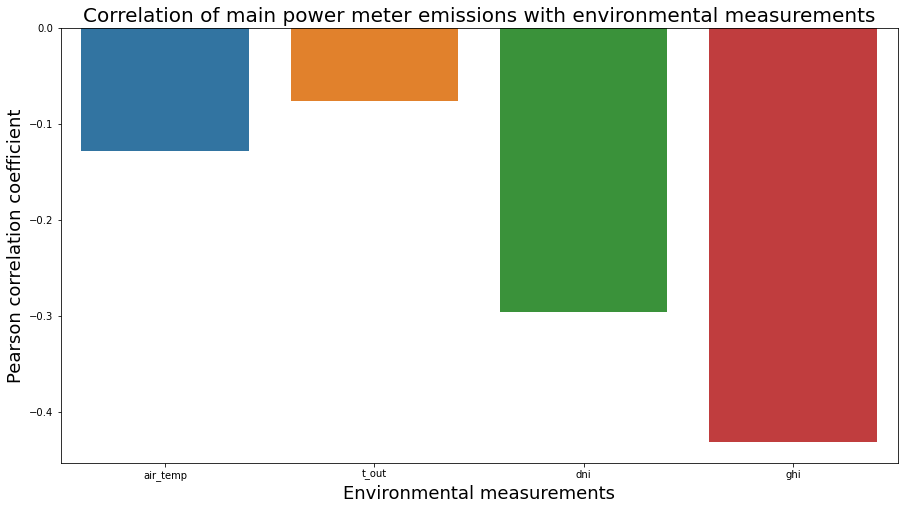

In [201]:
correlation_matrix = df_MJ.corr()
correlation_with_emissions = correlation_matrix['HVAC'].drop('HVAC')  # Drop self-correlation
plt.figure(figsize=[15, 8])
sns.barplot(x=correlation_with_emissions.index, y=correlation_with_emissions.values)
plt.title('Correlation of main power meter emissions with environmental measurements', fontsize = 20)
plt.xlabel('Environmental measurements', fontsize = 18)
plt.ylabel('Pearson correlation coefficient', fontsize = 18)
plt.show()

Time window: Jul - Sep

In [202]:
df_JS = df_hourly_occ[(df_hourly_occ['datetime'].dt.month >= 7) & (df_hourly_occ['datetime'].dt.month <= 9)]
df_JS = df_JS[columns + ['air_temp', 't_out', 'dni', 'ghi']]

/Users/aoyuzou/Documents/Mac/ClassMaterial/ARCH299/SDH/functions/utils_plot.py:96: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([f'{y:.2f}{unit}' for y in y_ticks])


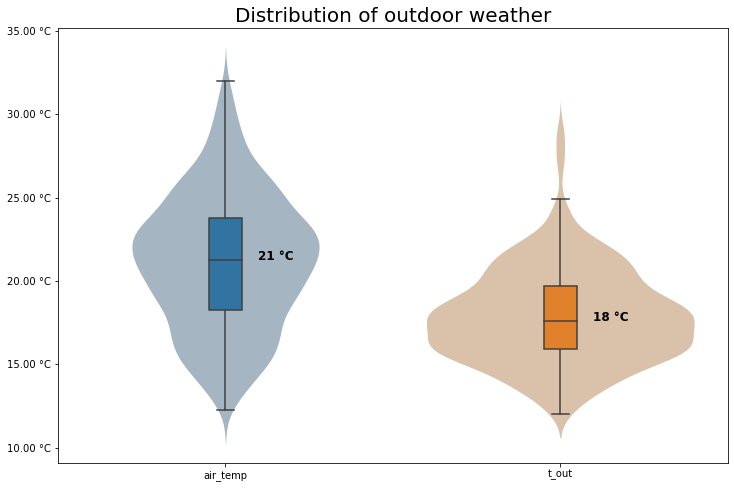

In [203]:
utils_plot.create_violin_plot(df_JS, ['air_temp', 't_out'], ' °C', 'Distribution of outdoor weather', figsize=(12, 8))

/Users/aoyuzou/Documents/Mac/ClassMaterial/ARCH299/SDH/functions/utils_plot.py:96: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([f'{y:.2f}{unit}' for y in y_ticks])


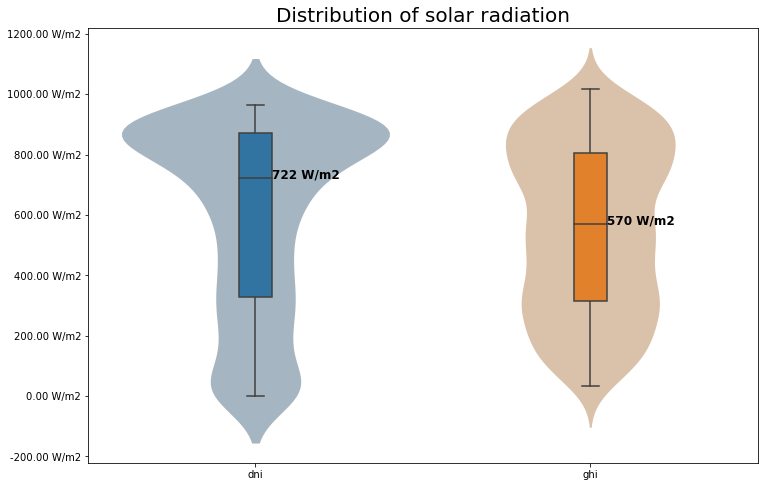

In [204]:
utils_plot.create_violin_plot(df_JS, ['dni', 'ghi'], ' W/m2', 'Distribution of solar radiation', figsize=(12, 8))

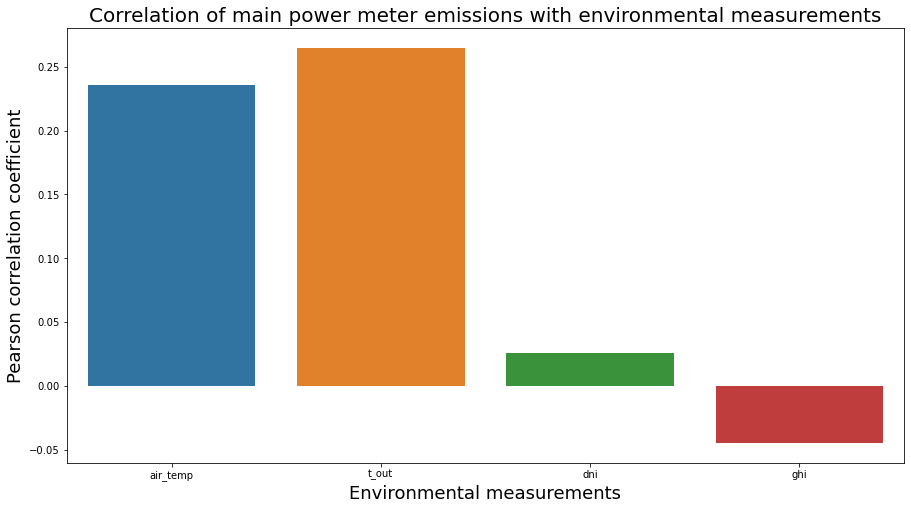

In [205]:
correlation_matrix = df_JS.corr()
correlation_with_emissions = correlation_matrix['HVAC'].drop('HVAC')  # Drop self-correlation
plt.figure(figsize=[15, 8])
sns.barplot(x=correlation_with_emissions.index, y=correlation_with_emissions.values)
plt.title('Correlation of main power meter emissions with environmental measurements', fontsize = 20)
plt.xlabel('Environmental measurements', fontsize = 18)
plt.ylabel('Pearson correlation coefficient', fontsize = 18)
plt.show()

Time window: Oct - Feb

In [206]:
df_OF = df_hourly_occ[(df_hourly_occ['datetime'].dt.month >= 10) | (df_hourly_occ['datetime'].dt.month <= 3)]
df_OF = df_OF[columns + ['air_temp', 't_out', 'dni', 'ghi']]

/Users/aoyuzou/Documents/Mac/ClassMaterial/ARCH299/SDH/functions/utils_plot.py:96: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([f'{y:.2f}{unit}' for y in y_ticks])


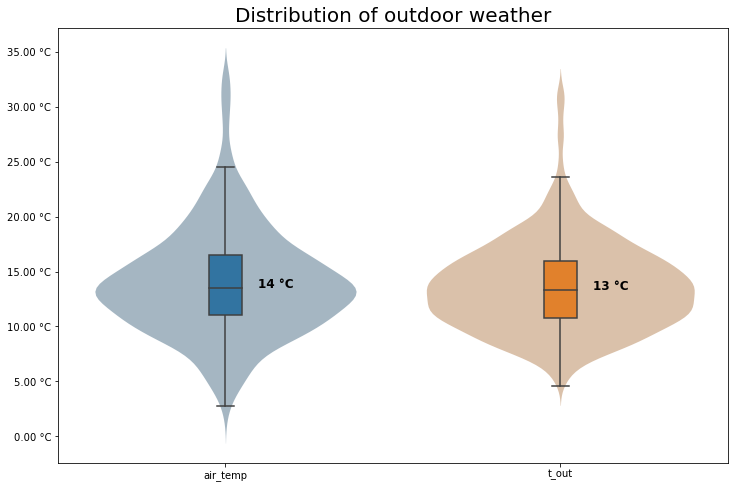

In [207]:
utils_plot.create_violin_plot(df_OF, ['air_temp', 't_out'], ' °C', 'Distribution of outdoor weather', figsize=(12, 8))

/Users/aoyuzou/Documents/Mac/ClassMaterial/ARCH299/SDH/functions/utils_plot.py:96: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([f'{y:.2f}{unit}' for y in y_ticks])


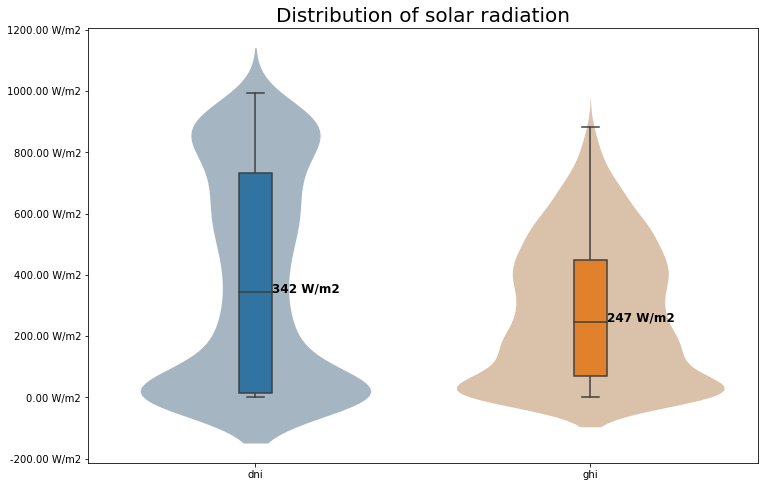

In [208]:
utils_plot.create_violin_plot(df_OF, ['dni', 'ghi'], ' W/m2', 'Distribution of solar radiation', figsize = (12, 8))

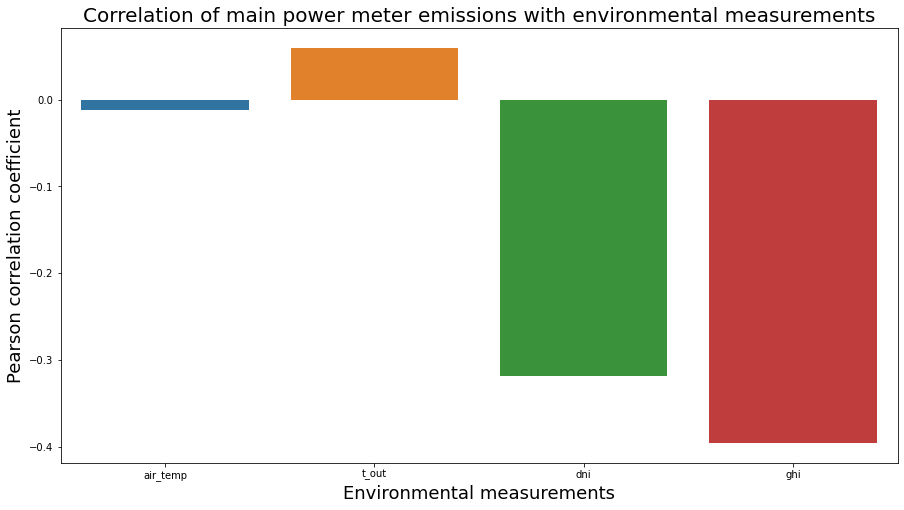

In [209]:
correlation_matrix = df_OF.corr()
correlation_with_emissions = correlation_matrix['HVAC'].drop('HVAC')  # Drop self-correlation
plt.figure(figsize=[15, 8])
sns.barplot(x=correlation_with_emissions.index, y=correlation_with_emissions.values)
plt.title('Correlation of main power meter emissions with environmental measurements', fontsize = 20)
plt.xlabel('Environmental measurements', fontsize = 18)
plt.ylabel('Pearson correlation coefficient', fontsize = 18)
plt.show()

Load shift analysis

Time window: August ~ September

In [210]:
df_hourly_emissions = df_hourly_occ[(df_hourly_occ['datetime'].dt.month >= 7) & (df_hourly_occ['datetime'].dt.month <= 9)]
df_hourly_emissions = df_hourly_emissions[columns + ['datetime']]
# Ensure Datetime is the index
df_hourly_emissions['Hour'] = df_hourly_emissions['datetime'].dt.hour

# Pivot table to rearrange the DataFrame
df_pivot = df_hourly_emissions.pivot_table(index=df_hourly_emissions['datetime'].dt.date, columns='Hour', values='HVAC', aggfunc='sum')
df_pivot.reset_index(inplace=True)

/Users/aoyuzou/Documents/Mac/ClassMaterial/ARCH299/SDH/functions/utils_plot.py:96: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([f'{y:.2f}{unit}' for y in y_ticks])


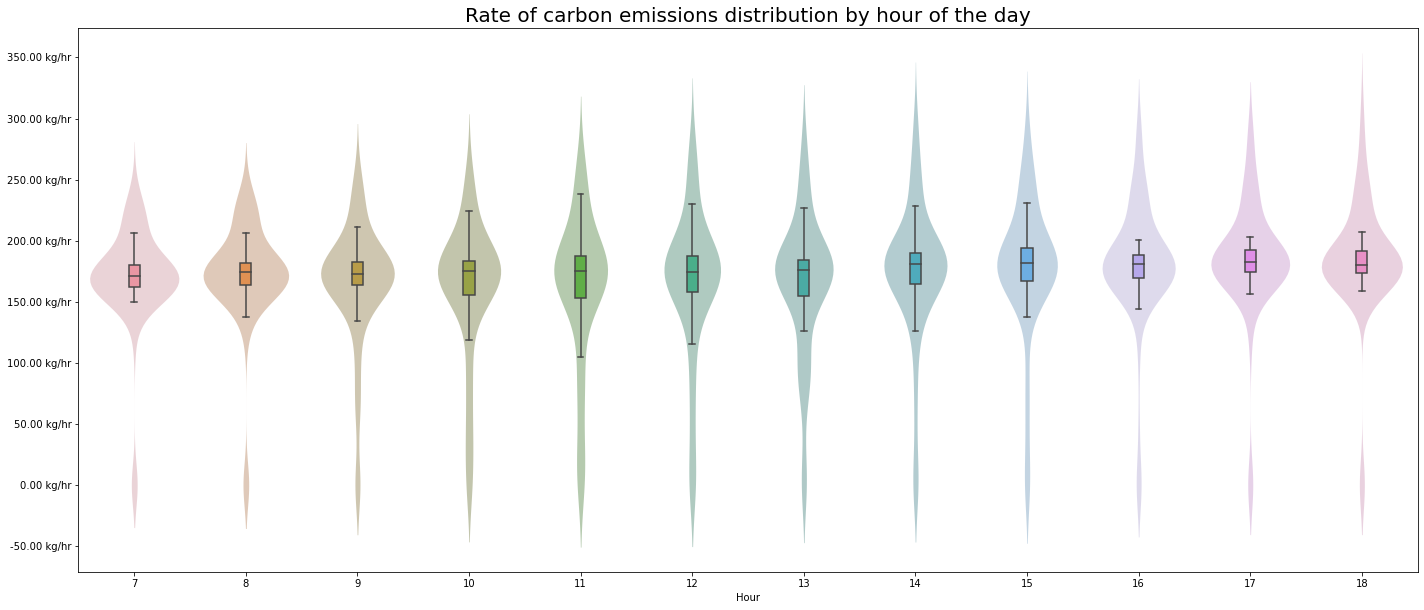

In [211]:
utils_plot.create_violin_plot(df_pivot, range(7, 19), ' kg/hr', 'Rate of carbon emissions distribution by hour of the day', figsize=(24, 10), annotation=False)

Time window: March ~ July

In [212]:
df_hourly_emissions = df_hourly_occ[(df_hourly_occ['datetime'].dt.month >= 3) & (df_hourly_occ['datetime'].dt.month <= 6)]
df_hourly_emissions = df_hourly_emissions[columns + ['datetime']]
# Ensure Datetime is the index
df_hourly_emissions['Hour'] = df_hourly_emissions['datetime'].dt.hour

# Pivot table to rearrange the DataFrame
df_pivot = df_hourly_emissions.pivot_table(index=df_hourly_emissions['datetime'].dt.date, columns='Hour', values='HVAC', aggfunc='sum')
df_pivot.reset_index(inplace=True)

/Users/aoyuzou/Documents/Mac/ClassMaterial/ARCH299/SDH/functions/utils_plot.py:96: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([f'{y:.2f}{unit}' for y in y_ticks])


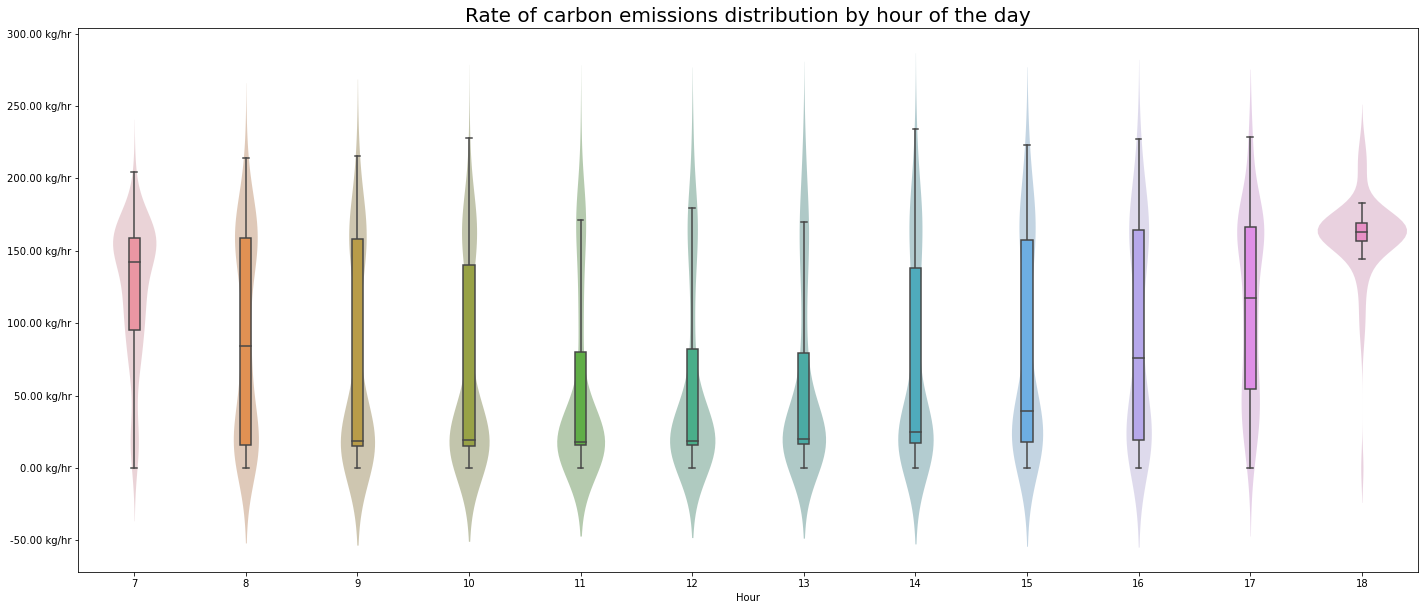

In [213]:
utils_plot.create_violin_plot(df_pivot, range(7, 19), ' kg/hr', 'Rate of carbon emissions distribution by hour of the day', figsize=(24, 10), annotation=False)

In [214]:
# Prepare dataframe
power = df_HVAC[['datetime'] + columns]
power.columns = ['datetime', 'power']
emissions = df_emissions[['datetime'] + columns]
emissions.columns = ['datetime', 'emissions']

# merge
df_ls = pd.merge(emissions, power, on = 'datetime', how = 'outer')
df_ls = pd.merge(df_ls, df_moer[['datetime', 'moer']], on = 'datetime', how = 'outer')

# interpolation for missing data
df_ls = df_ls.set_index('datetime')
df_ls = df_ls.groupby(pd.Grouper(freq='D')).apply(utils_get.process_group).dropna(how='all', axis=0)
df_ls.reset_index(inplace=True)

# filter out occupied hours
df_ls = df_ls[(df_ls['datetime'].dt.month >= 3) & (df_ls['datetime'].dt.month <= 7)]
df_ls_occ = df_ls[(df_ls['datetime'].dt.hour >= 7) & (df_ls['datetime'].dt.hour <= 18)]
df_ls_occ['hod'] = df_ls_occ['datetime'].dt.hour
df_ls_occ.reset_index(drop=True, inplace=True)

/var/folders/ft/7hzjv0495k35n45mr07kxdbh0000gn/T/ipykernel_25813/3371343427.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ls_occ['hod'] = df_ls_occ['datetime'].dt.hour


In [215]:
potential = []
i = 0
saving = 0
while i < len(df_ls_occ):
    if df_ls_occ['hod'][i] in[11, 12, 13, 14]:
        potential.append(df_ls_occ["power"][i] * 1.25)
        saving = saving - df_ls_occ["power"][i] * 0.25
    elif df_ls_occ['hod'][i] in[15, 16, 17]:
        potential.append(df_ls_occ["power"][i] + saving / 12)
    else:
        if df_ls_occ['hod'][i] == 18:
            saving = 0
        potential.append(df_ls_occ["power"][i])
    i = i + 1

df_ls_occ['potential_power'] = potential
df_ls_occ['potential_emissions'] = df_ls_occ['potential_power'] * df_ls_occ['moer'] / 1000

/var/folders/ft/7hzjv0495k35n45mr07kxdbh0000gn/T/ipykernel_25813/70825529.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ls_occ['potential_power'] = potential
/var/folders/ft/7hzjv0495k35n45mr07kxdbh0000gn/T/ipykernel_25813/70825529.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ls_occ['potential_emissions'] = df_ls_occ['potential_power'] * df_ls_occ['moer'] / 1000


/Users/aoyuzou/Documents/Mac/ClassMaterial/ARCH299/SDH/functions/utils_plot.py:96: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([f'{y:.2f}{unit}' for y in y_ticks])


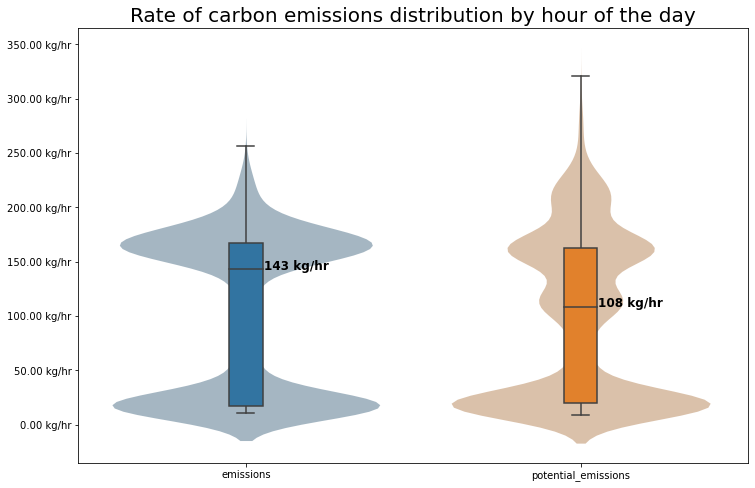

In [216]:
utils_plot.create_violin_plot(df_ls_occ, ['emissions', 'potential_emissions'], ' kg/hr', 'Rate of carbon emissions distribution by hour of the day', figsize=(12, 8))

/Users/aoyuzou/Documents/Mac/ClassMaterial/ARCH299/SDH/functions/utils_plot.py:96: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([f'{y:.2f}{unit}' for y in y_ticks])


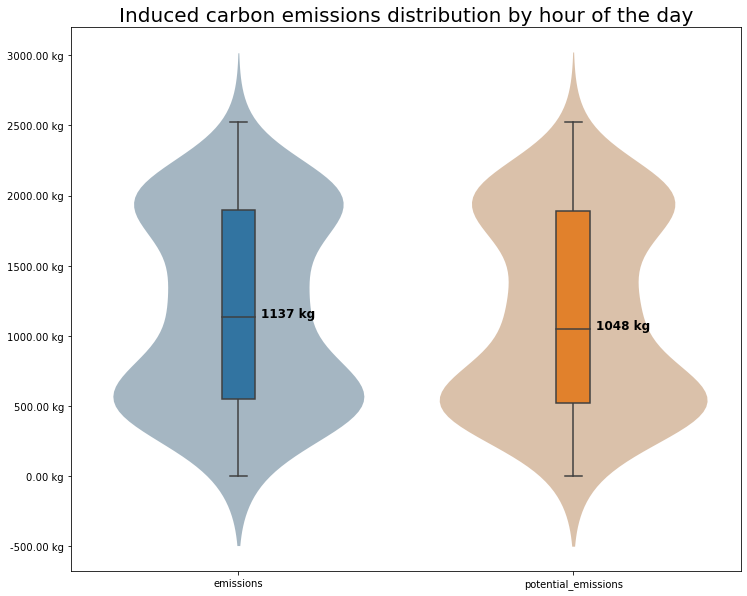

In [240]:
# Group by each day and calculate the sum of a specific column, say 'your_column_name'
daily_sum = df_ls_occ.set_index('datetime')
daily_sum = daily_sum.resample('D')[['emissions', 'power', 'potential_power', 'potential_emissions']].sum() * 0.25

# Convert the Series back to DataFrame if needed
daily_sum.reset_index(inplace=True)
daily_sum.head()

utils_plot.create_violin_plot(daily_sum, ['emissions', 'potential_emissions'], ' kg', 'Induced carbon emissions distribution by hour of the day', figsize=(12, 10))

In [239]:
df_ls_occ.to_csv("df_ls_occ.csv")

Chiller load shift approximation analysis

## Task 2: Examing HVAC carbon emissions for Nano fab

In [219]:
hvac = df_power['SDH.SW.MSA.MS41A.PWR REAL 3 P'] + df_power['SDH.SW.MSA.MS41B.PWR REAL 3 P']
df_HVAC = pd.DataFrame({'datetime': df_power['datetime'], 'HVAC': hvac})
columns = ['HVAC']
df_HVAC.head()

,datetime,HVAC
0,2023-01-20 15:45:00-08:00,331.999
1,2023-01-20 16:00:00-08:00,330.999
2,2023-01-20 16:15:00-08:00,334.499
3,2023-01-20 16:30:00-08:00,319.999
4,2023-01-20 16:45:00-08:00,325.999


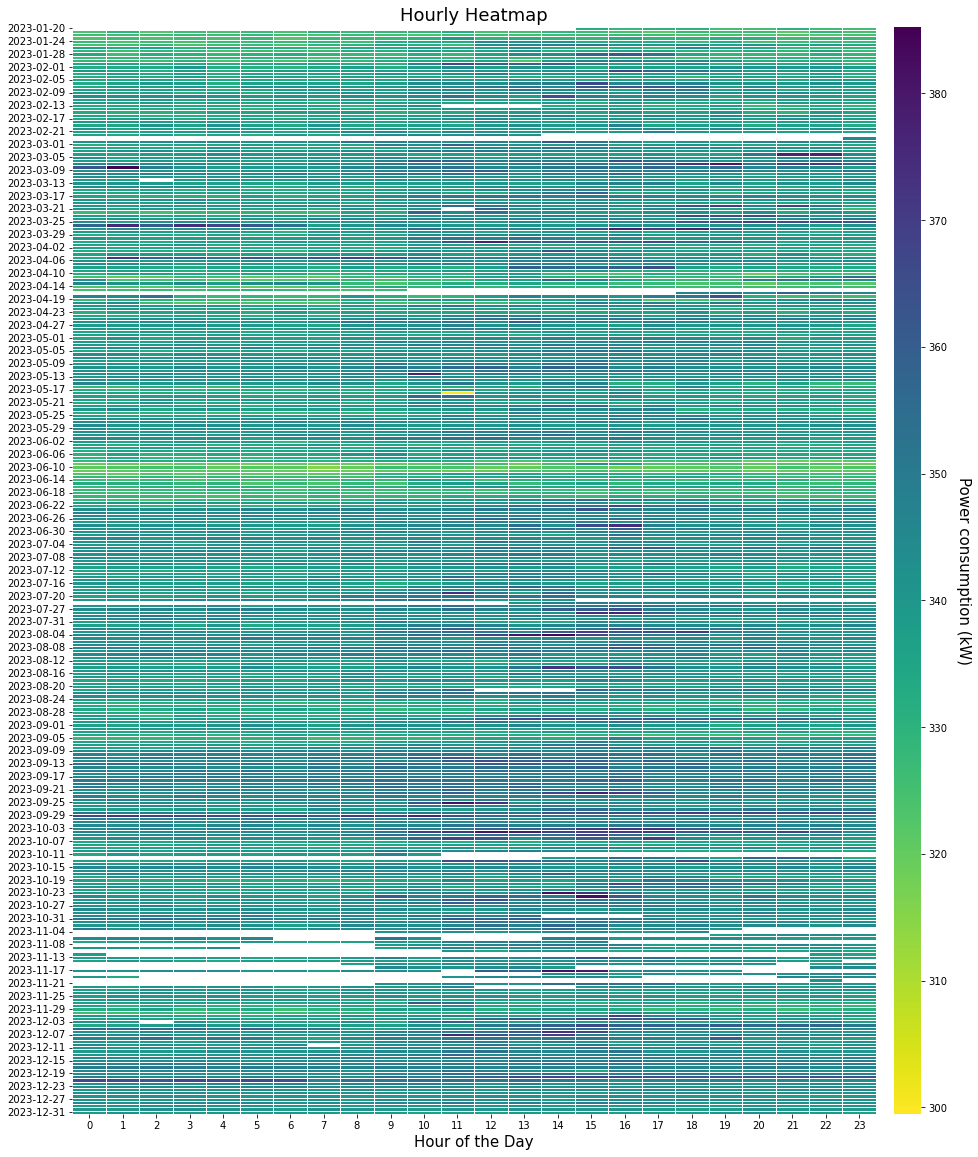

In [220]:
utils_plot.plot_hourly_heatmap(df_HVAC, columns, 'Power consumption (kW)', figsize=(18, 20))

In [221]:
df_temp = pd.merge(df_HVAC, df_moer, on = 'datetime', how = 'outer')
df_emissions = df_temp.copy()

# Multiply all columns except the first and last by the last column
df_emissions.iloc[:, 1:-1] = df_emissions.iloc[:, 1:-1].multiply(df_emissions.iloc[:, -1], axis="index") / 1000
df_emissions = df_emissions.drop(columns=['value', 'moer'])
# Now 'new_df' is the new DataFrame with the desired calculations

df_emissions.head()

,datetime,HVAC
0,2023-01-20 15:45:00-08:00,157.359558
1,2023-01-20 16:00:00-08:00,151.425643
2,2023-01-20 16:15:00-08:00,151.913167
3,2023-01-20 16:30:00-08:00,144.988987
4,2023-01-20 16:45:00-08:00,147.756873


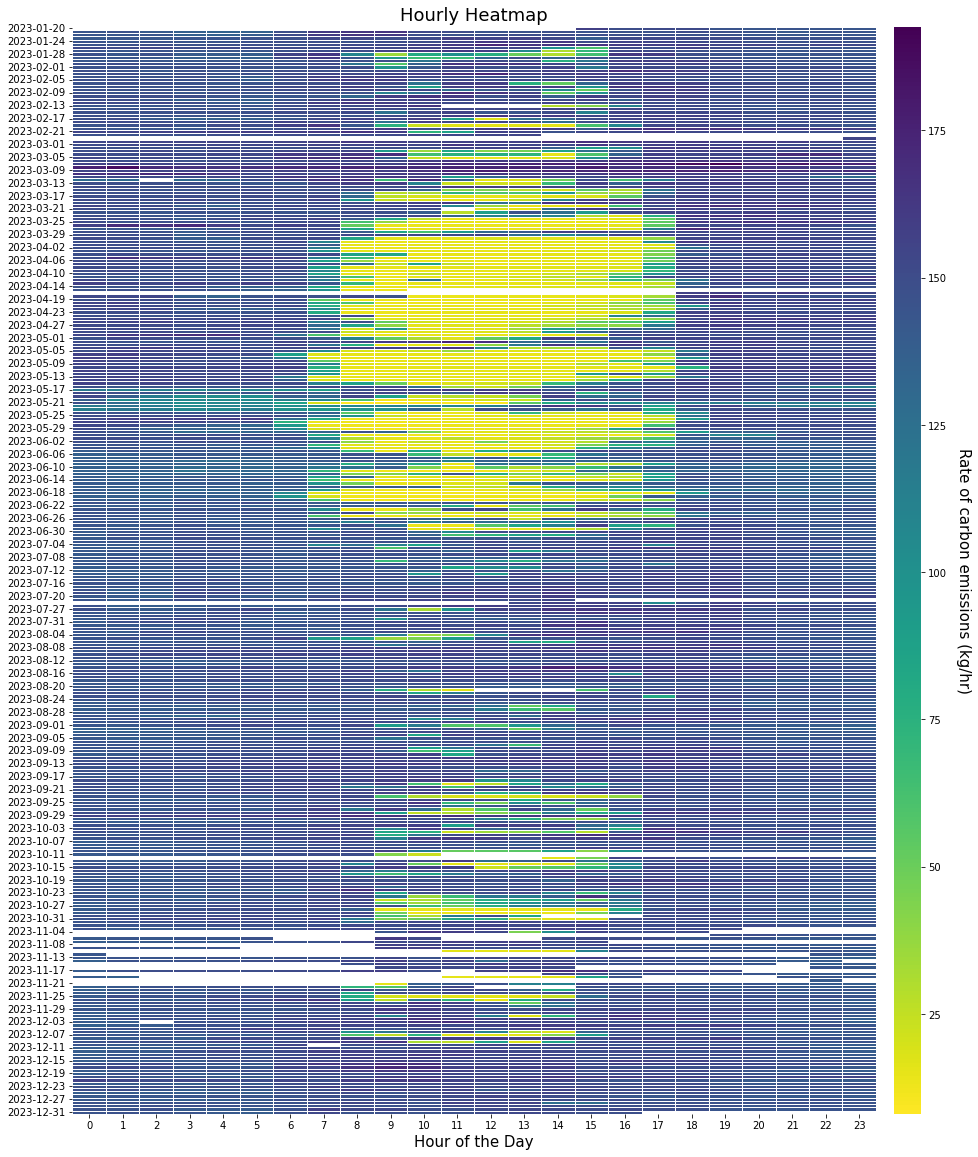

In [222]:
utils_plot.plot_hourly_heatmap(df_emissions, columns, 'Rate of carbon emissions (kg/hr)', figsize=(18, 20))

Get overall dataframe

In [223]:
df_all = pd.merge(df_emissions[['datetime', 'HVAC']], df_climate, on = 'datetime', how = 'outer')
df_hourly = df_all.set_index('datetime')
df_hourly = df_hourly.resample('1H').mean()
df_hourly.reset_index(inplace=True)
df_hourly_occ = df_hourly[(df_hourly['datetime'].dt.hour >= 7) & (df_hourly['datetime'].dt.hour <= 18)]


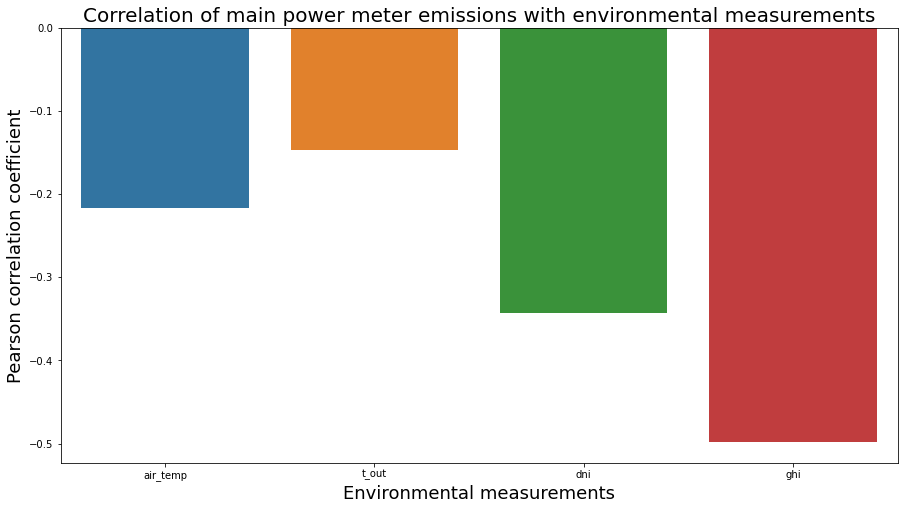

In [224]:
df_MJ = df_hourly_occ[(df_hourly_occ['datetime'].dt.month >= 3) & (df_hourly_occ['datetime'].dt.month <= 6)]
df_MJ = df_MJ[columns + ['air_temp', 't_out', 'dni', 'ghi']]
correlation_matrix = df_MJ.corr()
correlation_with_emissions = correlation_matrix['HVAC'].drop('HVAC')  # Drop self-correlation
plt.figure(figsize=[15, 8])
sns.barplot(x=correlation_with_emissions.index, y=correlation_with_emissions.values)
plt.title('Correlation of main power meter emissions with environmental measurements', fontsize = 20)
plt.xlabel('Environmental measurements', fontsize = 18)
plt.ylabel('Pearson correlation coefficient', fontsize = 18)
plt.show()

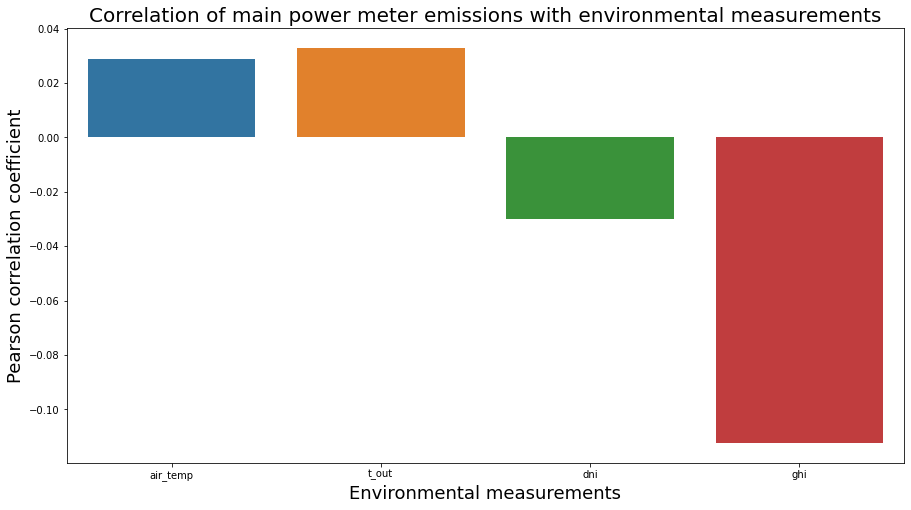

In [225]:
df_JS = df_hourly_occ[(df_hourly_occ['datetime'].dt.month >= 7) & (df_hourly_occ['datetime'].dt.month <= 9)]
df_JS = df_JS[columns + ['air_temp', 't_out', 'dni', 'ghi']]
correlation_matrix = df_JS.corr()
correlation_with_emissions = correlation_matrix['HVAC'].drop('HVAC')  # Drop self-correlation
plt.figure(figsize=[15, 8])
sns.barplot(x=correlation_with_emissions.index, y=correlation_with_emissions.values)
plt.title('Correlation of main power meter emissions with environmental measurements', fontsize = 20)
plt.xlabel('Environmental measurements', fontsize = 18)
plt.ylabel('Pearson correlation coefficient', fontsize = 18)
plt.show()

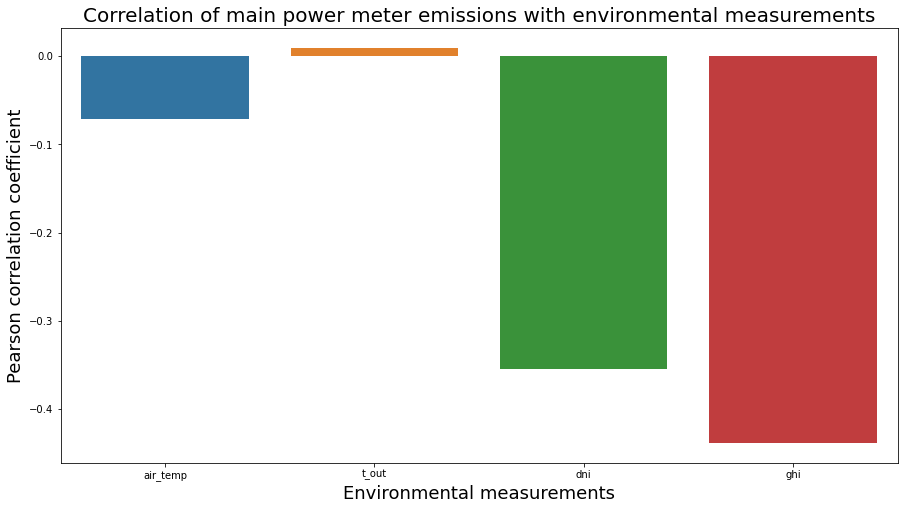

In [226]:
df_OF = df_hourly_occ[(df_hourly_occ['datetime'].dt.month >= 10) | (df_hourly_occ['datetime'].dt.month <= 3)]
df_OF = df_OF[columns + ['air_temp', 't_out', 'dni', 'ghi']]
correlation_matrix = df_OF.corr()
correlation_with_emissions = correlation_matrix['HVAC'].drop('HVAC')  # Drop self-correlation
plt.figure(figsize=[15, 8])
sns.barplot(x=correlation_with_emissions.index, y=correlation_with_emissions.values)
plt.title('Correlation of main power meter emissions with environmental measurements', fontsize = 20)
plt.xlabel('Environmental measurements', fontsize = 18)
plt.ylabel('Pearson correlation coefficient', fontsize = 18)
plt.show()

## Task 3: Examing HVAC carbon emissions for office space

In [227]:
hvac = df_power['SDH.SW.MSA.CD4RA.PWR REAL 3 P'] + df_power['SDH.SW.MSB.MS41B.PWR REAL 3 P']
df_HVAC = pd.DataFrame({'datetime': df_power['datetime'], 'HVAC': hvac})
columns = ['HVAC']
df_HVAC.head()

,datetime,HVAC
0,2023-01-20 15:45:00-08:00,204.998
1,2023-01-20 16:00:00-08:00,204.998
2,2023-01-20 16:15:00-08:00,200.498
3,2023-01-20 16:30:00-08:00,210.998
4,2023-01-20 16:45:00-08:00,184.998


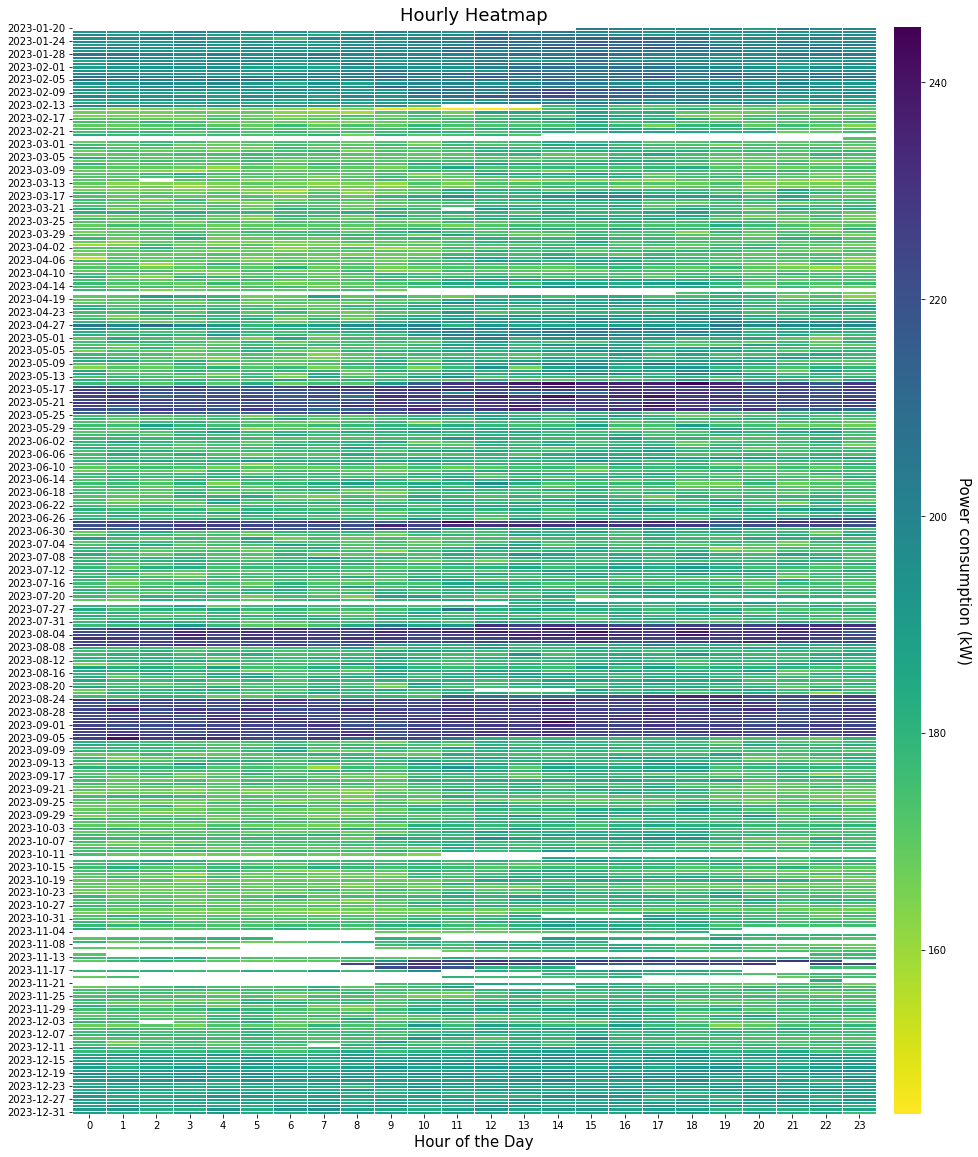

In [228]:
utils_plot.plot_hourly_heatmap(df_HVAC, columns, 'Power consumption (kW)', figsize=(18, 20))

In [229]:
df_temp = pd.merge(df_HVAC, df_moer, on = 'datetime', how = 'outer')
df_emissions = df_temp.copy()

# Multiply all columns except the first and last by the last column
df_emissions.iloc[:, 1:-1] = df_emissions.iloc[:, 1:-1].multiply(df_emissions.iloc[:, -1], axis="index") / 1000
df_emissions = df_emissions.drop(columns=['value', 'moer'])
# Now 'new_df' is the new DataFrame with the desired calculations

df_emissions.head()

,datetime,HVAC
0,2023-01-20 15:45:00-08:00,97.164132
1,2023-01-20 16:00:00-08:00,93.782622
2,2023-01-20 16:15:00-08:00,91.056434
3,2023-01-20 16:30:00-08:00,95.601506
4,2023-01-20 16:45:00-08:00,83.849110


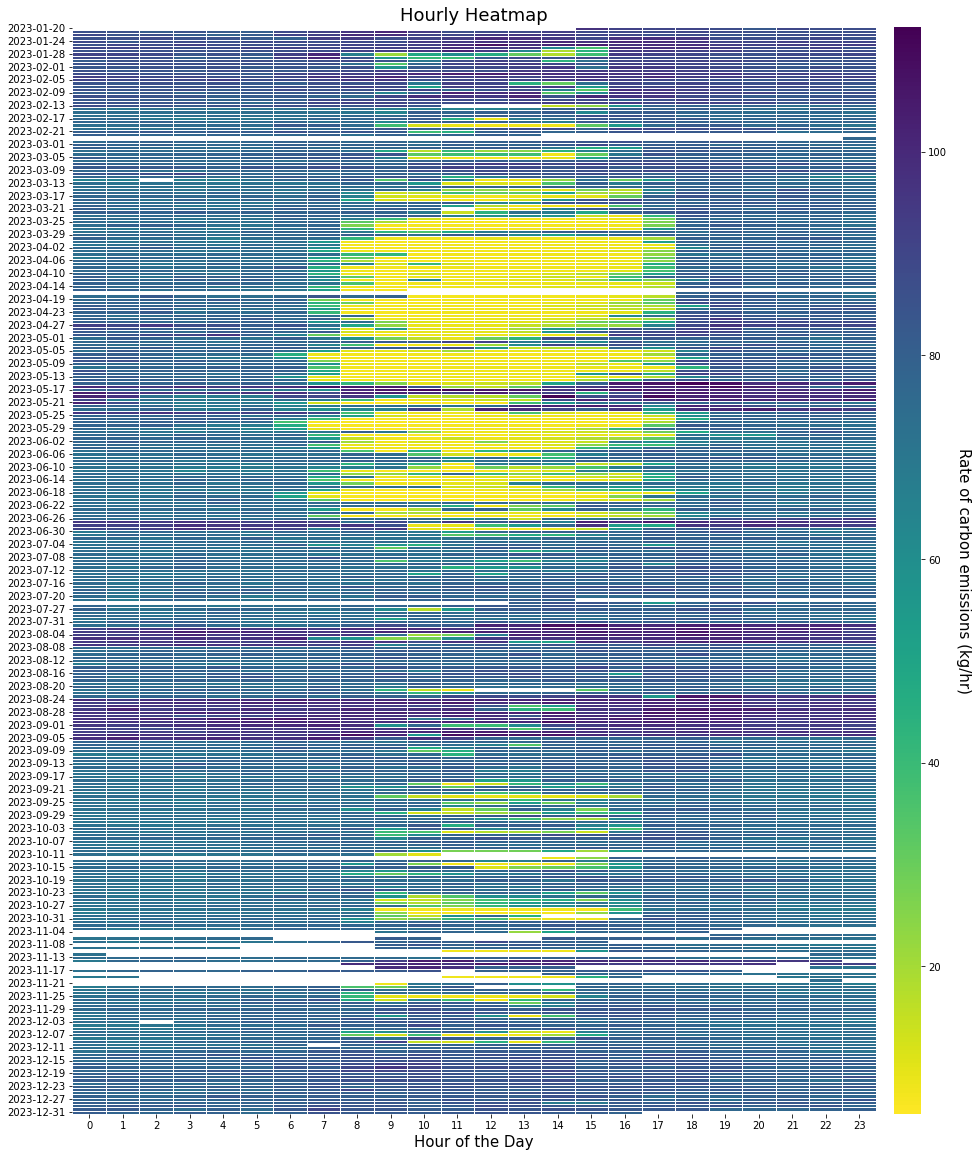

In [230]:
utils_plot.plot_hourly_heatmap(df_emissions, columns, 'Rate of carbon emissions (kg/hr)', figsize=(18, 20))

Get overall dataframe

In [231]:
df_all = pd.merge(df_emissions[['datetime', 'HVAC']], df_climate, on = 'datetime', how = 'outer')
df_hourly = df_all.set_index('datetime')
df_hourly = df_hourly.resample('1H').mean()
df_hourly.reset_index(inplace=True)
df_hourly_occ = df_hourly[(df_hourly['datetime'].dt.hour >= 7) & (df_hourly['datetime'].dt.hour <= 18)]

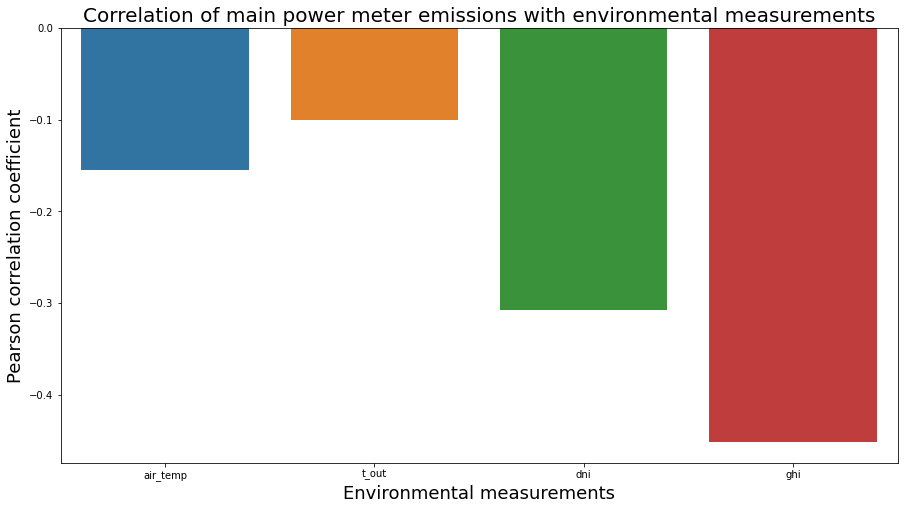

In [232]:
df_MJ = df_hourly_occ[(df_hourly_occ['datetime'].dt.month >= 3) & (df_hourly_occ['datetime'].dt.month <= 6)]
df_MJ = df_MJ[columns + ['air_temp', 't_out', 'dni', 'ghi']]
correlation_matrix = df_MJ.corr()
correlation_with_emissions = correlation_matrix['HVAC'].drop('HVAC')  # Drop self-correlation
plt.figure(figsize=[15, 8])
sns.barplot(x=correlation_with_emissions.index, y=correlation_with_emissions.values)
plt.title('Correlation of main power meter emissions with environmental measurements', fontsize = 20)
plt.xlabel('Environmental measurements', fontsize = 18)
plt.ylabel('Pearson correlation coefficient', fontsize = 18)
plt.show()

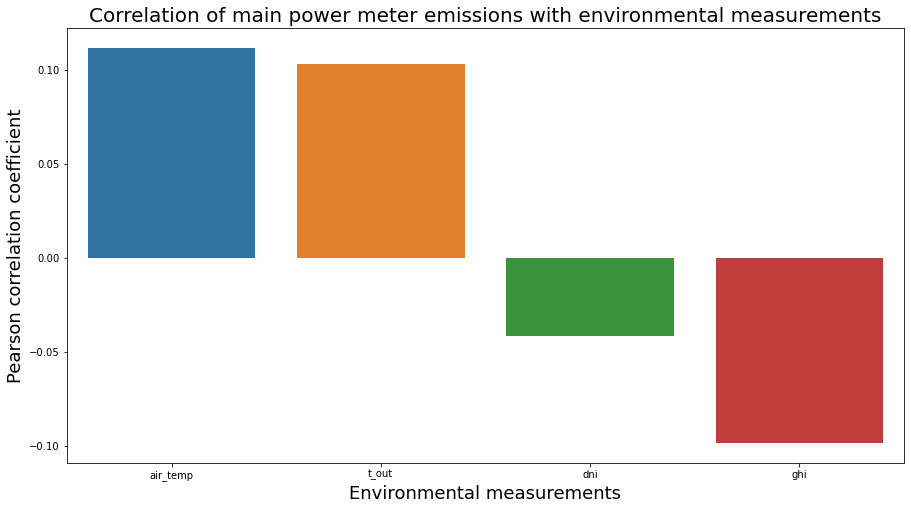

In [233]:
df_JS = df_hourly_occ[(df_hourly_occ['datetime'].dt.month >= 7) & (df_hourly_occ['datetime'].dt.month <= 9)]
df_JS = df_JS[columns + ['air_temp', 't_out', 'dni', 'ghi']]
correlation_matrix = df_JS.corr()
correlation_with_emissions = correlation_matrix['HVAC'].drop('HVAC')  # Drop self-correlation
plt.figure(figsize=[15, 8])
sns.barplot(x=correlation_with_emissions.index, y=correlation_with_emissions.values)
plt.title('Correlation of main power meter emissions with environmental measurements', fontsize = 20)
plt.xlabel('Environmental measurements', fontsize = 18)
plt.ylabel('Pearson correlation coefficient', fontsize = 18)
plt.show()

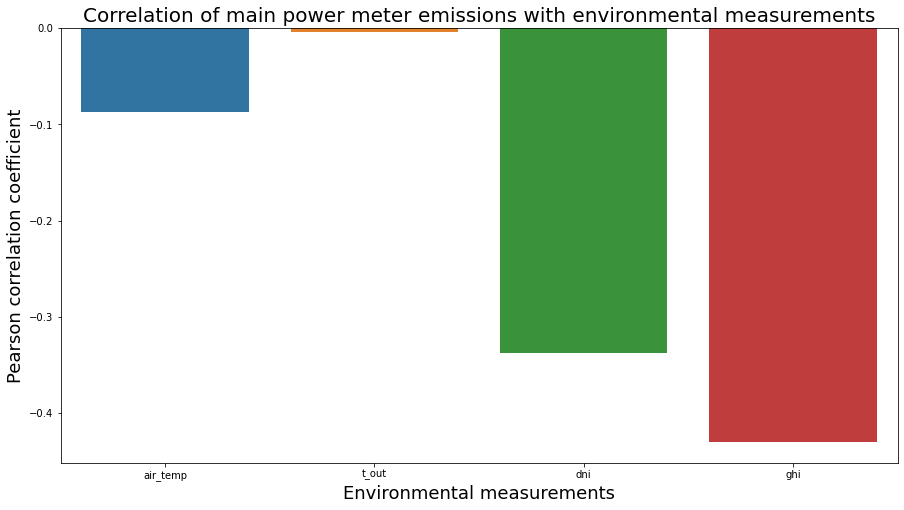

In [234]:
df_OF = df_hourly_occ[(df_hourly_occ['datetime'].dt.month >= 10) | (df_hourly_occ['datetime'].dt.month <= 3)]
df_OF = df_OF[columns + ['air_temp', 't_out', 'dni', 'ghi']]
correlation_matrix = df_OF.corr()
correlation_with_emissions = correlation_matrix['HVAC'].drop('HVAC')  # Drop self-correlation
plt.figure(figsize=[15, 8])
sns.barplot(x=correlation_with_emissions.index, y=correlation_with_emissions.values)
plt.title('Correlation of main power meter emissions with environmental measurements', fontsize = 20)
plt.xlabel('Environmental measurements', fontsize = 18)
plt.ylabel('Pearson correlation coefficient', fontsize = 18)
plt.show()

## Task 3: Examing HVAC carbon emissions for lighting and plug-load

In [235]:
hvac = df_power['SDH.SW.MSB.CB4A.PWR REAL 3 P']
df_HVAC = pd.DataFrame({'datetime': df_power['datetime'], 'HVAC': hvac})
columns = ['HVAC']
df_HVAC.head()

,datetime,HVAC
0,2023-01-20 15:45:00-08:00,55.999
1,2023-01-20 16:00:00-08:00,55.999
2,2023-01-20 16:15:00-08:00,57.999
3,2023-01-20 16:30:00-08:00,55.999
4,2023-01-20 16:45:00-08:00,54.999


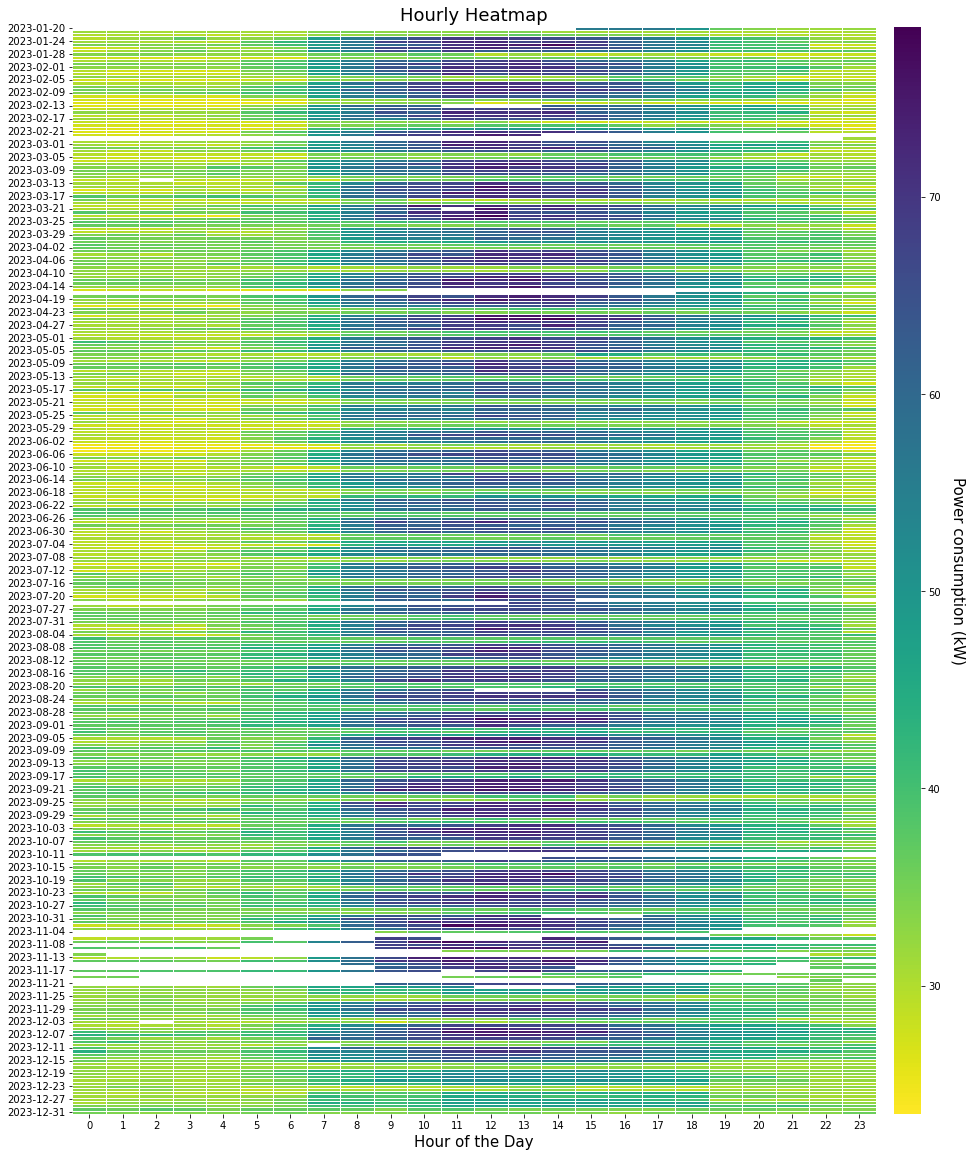

In [236]:
utils_plot.plot_hourly_heatmap(df_HVAC, columns, 'Power consumption (kW)', figsize=(18, 20))

In [237]:
df_temp = pd.merge(df_HVAC, df_moer, on = 'datetime', how = 'outer')
df_emissions = df_temp.copy()

# Multiply all columns except the first and last by the last column
df_emissions.iloc[:, 1:-1] = df_emissions.iloc[:, 1:-1].multiply(df_emissions.iloc[:, -1], axis="index") / 1000
df_emissions = df_emissions.drop(columns=['value', 'moer'])
# Now 'new_df' is the new DataFrame with the desired calculations

df_emissions.head()

,datetime,HVAC
0,2023-01-20 15:45:00-08:00,26.542182
1,2023-01-20 16:00:00-08:00,25.618460
2,2023-01-20 16:15:00-08:00,26.340323
3,2023-01-20 16:30:00-08:00,25.372699
4,2023-01-20 16:45:00-08:00,24.927930


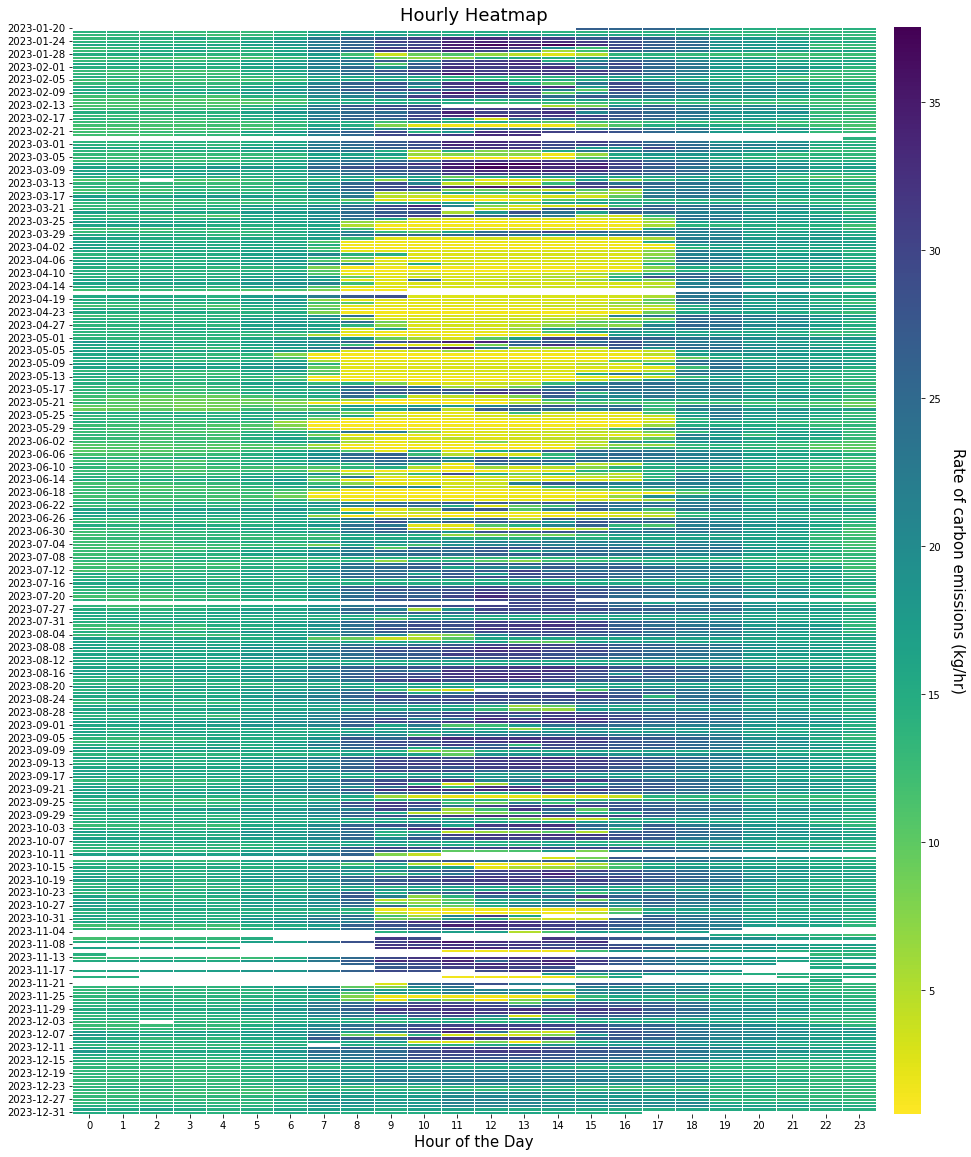

In [238]:
utils_plot.plot_hourly_heatmap(df_emissions, columns, 'Rate of carbon emissions (kg/hr)', figsize=(18, 20))